In [2]:
# Use Braket SDK Cost Tracking to estimate the cost to run this example
from braket.tracking import Tracker
t = Tracker().start()


# general imports
import matplotlib.pyplot as plt
%matplotlib inline

# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit, Gate, Instruction, circuit, Observable
from braket.devices import LocalSimulator
from braket.aws import AwsDevice
import numpy as np

#Device graph plotting
import networkx as nx

#Image plotting
from PIL import Image

import json


# Listing methods for available properties of various devices

In [6]:
def list_device_properties( device):

    print("#############################")

    if type(device) != AwsDevice:
        print(" list_device_properties : Input type error")
        return

    print( "Device name: ", device.name)
    print( "Device type: ", device.type)
    print( "Device arn: ", device.arn)
    print( "Device provider:", device.provider_name)
    print( "Device status:", device.status)
    print( "Device availability: ", device.is_available)
    print( "Device region: ", device.get_device_region( device.arn))

    topo = device.topology_graph
    
    if topo == None:
        print("No associated device topology")
    else:
        nx.draw_kamada_kawai(device.topology_graph, with_labels=True, font_weight="bold")

def list_device_service_properties( device):
    service = device.properties.service

    times = service.executionWindows
    docu = service.deviceDocumentation

    #todo: show funny image

    # img_url = docu.imageUrl
    # with Image.open(img_url) as img :
    #     img.show()

    print( "#######################")
    print("Device Name:", device.name)
    print( docu.summary)
    print( "Device location:",service.deviceLocation)
    print( "More information at:", docu.externalDocumentationUrl )
    print( "Shots range accepted :", service.shotsRange)
    print( " Service cost unit :", service.deviceCost.unit, "/// Price per unit :", service.deviceCost.price)
    print("Last metadata update:", service.updatedAt )

    #debug line to obtain available properties
    #
    for key  in vars(service).keys() :
        print( key)

# device provider specific properties, so you can't really get much out of this automatically
def list_device_provider_properties( device) :
    provider = device.properties.provider

    #debug line to obtain available properties
    #
    for key ,value in provider:
        print( key, value)

#todo : dechiper action metadata
def list_device_action_properties( device) :
    action = device.properties.action


    #debug line to obtain available properties
    #
    for key  in action.keys() :
        print( key)

def list_device_paradigm_properties( device) :
    paradigm = device.properties.paradigm


    print( "#######################")
    print("Device Name:", device.name)
    print("Qbit count:", paradigm.qubitCount)
    print("Fully connected Topology:", paradigm.connectivity.fullyConnected)
    print("Device native gates list:", paradigm.nativeGateSet)
    
    #debug line to obtain available properties
    #
    # for key ,values in paradigm :
    #     print( key, values)


#todo : dechiper parameters metadata
def list_device_parameters_properties( device) :
    param = device.properties.deviceParameters

    #debug line to obtain available properties
    #
    for key  in param.keys():
        print( key)


In [7]:
#test

#IonQ device
device = AwsDevice("arn:aws:braket:::device/qpu/ionq/ionQdevice")
list_device_parameters_properties( device)

title
description
type
properties
required
definitions


list_device_properties Results for major devices

In [53]:
#Local Simulator
device = LocalSimulator()
list_device_properties( device)

#Amazon SV1
device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/sv1")
list_device_properties( device)

#Amazon DM1
device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/dm1")
list_device_properties( device)

#Amazon TN1
device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/tn1")
list_device_properties( device)

#############################
 list_device_properties : Input type error
#############################
Device name:  SV1
Device type:  AwsDeviceType.SIMULATOR
Device arn:  arn:aws:braket:::device/quantum-simulator/amazon/sv1
Device provider: Amazon Braket
Device status: ONLINE
Device availability:  True
Device region:  
No associated device topology
<class 'braket.device_schema.simulators.gate_model_simulator_device_capabilities_v1.GateModelSimulatorDeviceCapabilities'>
#############################
Device name:  dm1
Device type:  AwsDeviceType.SIMULATOR
Device arn:  arn:aws:braket:::device/quantum-simulator/amazon/dm1
Device provider: Amazon Braket
Device status: ONLINE
Device availability:  True
Device region:  
No associated device topology
<class 'braket.device_schema.simulators.gate_model_simulator_device_capabilities_v1.GateModelSimulatorDeviceCapabilities'>
#############################
Device name:  TN1
Device type:  AwsDeviceType.SIMULATOR
Device arn:  arn:aws:braket:::device/

#############################
Device name:  IonQ Device
Device type:  AwsDeviceType.QPU
Device arn:  arn:aws:braket:::device/qpu/ionq/ionQdevice
Device provider: IonQ
Device status: ONLINE
Device availability:  True
Device region:  


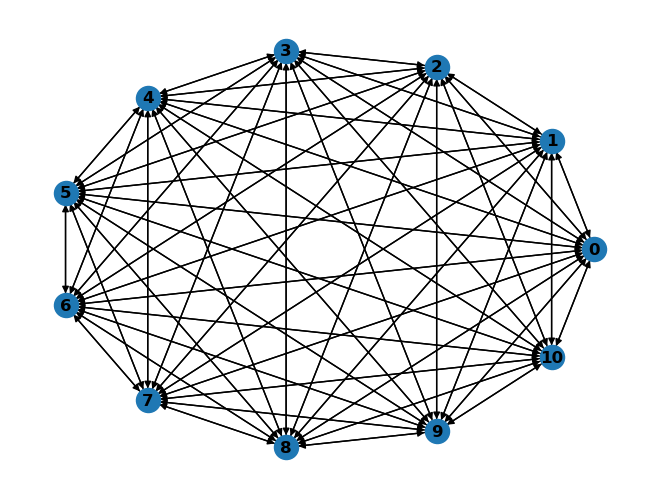

In [47]:
#IonQ device
device = AwsDevice("arn:aws:braket:::device/qpu/ionq/ionQdevice")
list_device_properties( device)


#############################
Device name:  Aspen-11
Device type:  AwsDeviceType.QPU
Device arn:  arn:aws:braket:::device/qpu/rigetti/Aspen-11
Device provider: Rigetti
Device status: OFFLINE
Device availability:  False
Device region:  


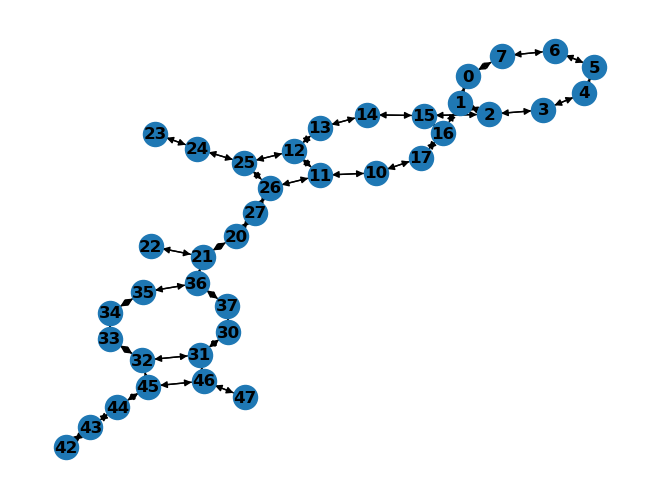

In [5]:

#Rigetti Aspen11
device = AwsDevice('arn:aws:braket:::device/qpu/rigetti/Aspen-11')
list_device_properties( device)


#############################
Device name:  Aspen-M-2
Device type:  AwsDeviceType.QPU
Device arn:  arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-2
Device provider: Rigetti
Device status: ONLINE
Device availability:  True
Device region:  us-west-1


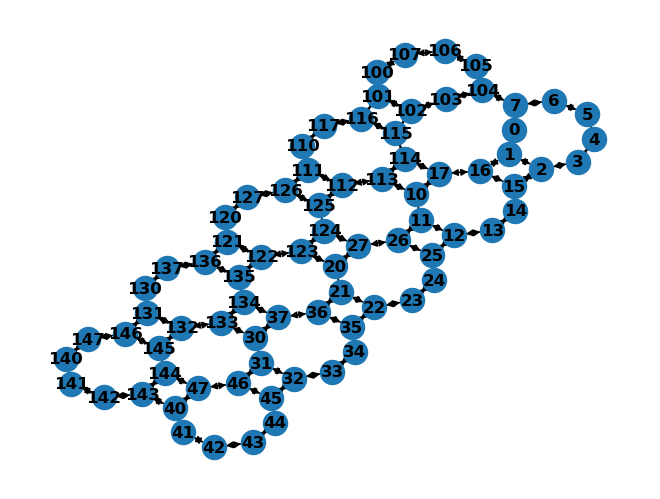

In [49]:

#Rigetti AspenM2
device = AwsDevice('arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-2')
list_device_properties( device)


#############################
Device name:  Lucy
Device type:  AwsDeviceType.QPU
Device arn:  arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy
Device provider: Oxford
Device status: ONLINE
Device availability:  False
Device region:  eu-west-2


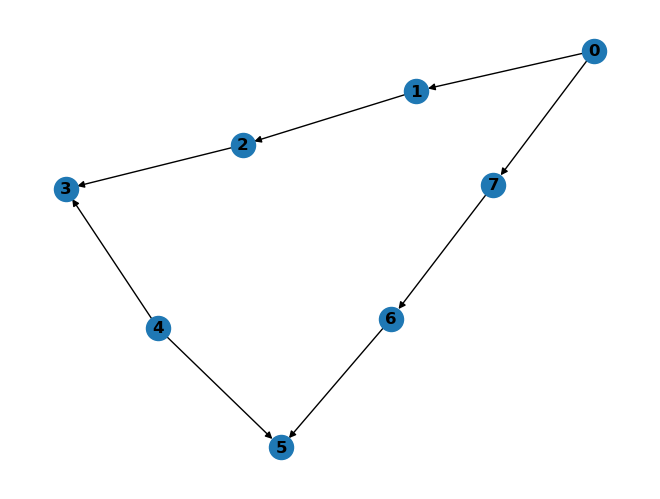

In [50]:
#OQC Lucy
device = AwsDevice('arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy')
list_device_properties( device)